In [40]:
import selenium
import pandas as pd
import numpy as np
import unittest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import chrome
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

In [41]:

def convert_text_to_number(text):
  """Converts a text string of a large number with commas to a number.

  Args:
    text: The text string to convert.

  Returns:
    The number represented by the text string.
  """

  pattern = r"^(-?\d+)(\,\d+)?"
  match = re.match(pattern, text)
  if match:
    return int(match.group(1).replace(",", ""))
  else:
    return None

In [42]:
# Set up the Selenium web driver
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=options , service=Service(ChromeDriverManager().install()))


In [43]:
cities = ["נהריה", "אילת", "חיפה", "נתניה", "תל אביב","אשדוד","אשקלון","הרצליה","ירושלים","באר שבע"]
date_arr = []
street_arr = []
rooms_arr = []
area_size_arr = []
floor_arr = []
price_arr = []
price_per_sm_arr = []
year_arr = []
city_arr = []

for city in cities:
    driver.get('https://www.ad.co.il/nadlanprice?keyword=' + city)
    
    # Adjust the number of iterations in the range function to fetch more rows
    for _ in range(100):  # Fetching 100 rows per city
        element = driver.find_elements(By.XPATH, '//*[@id="cards"]/div/table/tbody/tr')
        for row in element:
            date = row.find_elements(By.TAG_NAME, "td")[0]
            ci = row.find_elements(By.TAG_NAME, "td")[1]
            street = row.find_elements(By.TAG_NAME, "td")[2]
            rooms = row.find_elements(By.TAG_NAME, "td")[3]
            area_size = row.find_elements(By.TAG_NAME, "td")[4]
            floor = row.find_elements(By.TAG_NAME, "td")[5]
            price = row.find_elements(By.TAG_NAME, "td")[6]
            price_per_sm = row.find_elements(By.TAG_NAME, "td")[7]
            year = row.find_elements(By.TAG_NAME, "td")[8]

            print(date.text, ci.text, street.text, rooms.text, area_size.text, floor.text, price.text, price_per_sm.text, year.text)
            date_arr.append(date.text)
            street_arr.append(street.text)
            rooms_arr.append(convert_text_to_number(rooms.text))
            area_size_arr.append(convert_text_to_number(area_size.text))
            floor_arr.append(convert_text_to_number(floor.text))
            price_arr.append(convert_text_to_number(price.text))
            if price_per_sm:
                price_per_sm_arr.append(price_per_sm.text)
            else:
                price_per_sm_arr.append(None)
            year_arr.append(convert_text_to_number(year.text))
            city_arr.append(city)
    
driver.quit()


24/1/2021 נהריה תל חי 28 4 107  1,380,000 12,897 2020
24/1/2021 נהריה בלפור 10 4 107 1 1,380,000 12,897 2020
22/1/2021 נהריה בלפור 26 5 140 4 1,500,000 10,714 2021
22/1/2021 נהריה אלי כהן 2 3 65  600,000 9,230 1970
22/1/2021 נהריה בלפור 26 5 140  1,500,000 10,714 2021
22/1/2021 נהריה וולפסון 74 3 65 4 600,000 9,230 1970
18/1/2021 נהריה שמאי 19 4 119  1,430,000 12,016 2020
18/1/2021 נהריה נהריה 10 4 119 5 1,430,000 12,016 2020
17/1/2021 נהריה דוד רמז 27 5 137  1,630,000 11,897 2015
17/1/2021 נהריה רמז 29 5 137 2 1,630,000 11,897 2015
17/1/2021 נהריה אפרים שריר 20 3 75 3 625,000 8,333 1960
17/1/2021 נהריה אפרים שריר 24 3 75  625,000 8,333 1960
14/1/2021 נהריה תל חי 28 4 109  1,289,400 11,829 2019
14/1/2021 נהריה תל חי 2 4 100  1,130,000 11,300 2021
14/1/2021 נהריה תל חי 28 5 131  961,305 7,338 2020
14/1/2021 נהריה בלפור 1 5 131 2 961,305 7,338 2020
14/1/2021 נהריה בלפור 10 4 100 3 1,130,000 11,300 2021
14/1/2021 נהריה נהריה 10 4 109 1 1,289,400 11,829 2019
14/1/2021 נהריה נהריה 10 5 122 

In [ ]:
d = {'date': date_arr,
'rooms': rooms_arr,
'area_size': area_size_arr,
'floor': floor_arr,
'price': price_arr,
'year': year_arr,
'city': city_arr}

df = pd.DataFrame(data=d)

print(df)
df.to_csv('data.csv', index=True)


Empty DataFrame
Columns: [date, rooms, area_size, floor, price, year, city]
Index: []


In [ ]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [ ]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [ ]:
df.fillna(0, inplace=True)
x = df[['rooms', 'area_size']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create DataFrame with feature names
feature_names = ['rooms', 'area_size']
x_train = pd.DataFrame(x_train, columns=feature_names)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))


In [ ]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)

  def _gradient_descent_step(self, X, targets, lr):
    predictions = self.predict(X)
    error = predictions - targets
    gradient = np.dot(X.T, error) / len(X)
    self._W -= lr * gradient

  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(x, y, lr)       
        
    return self

In [ ]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

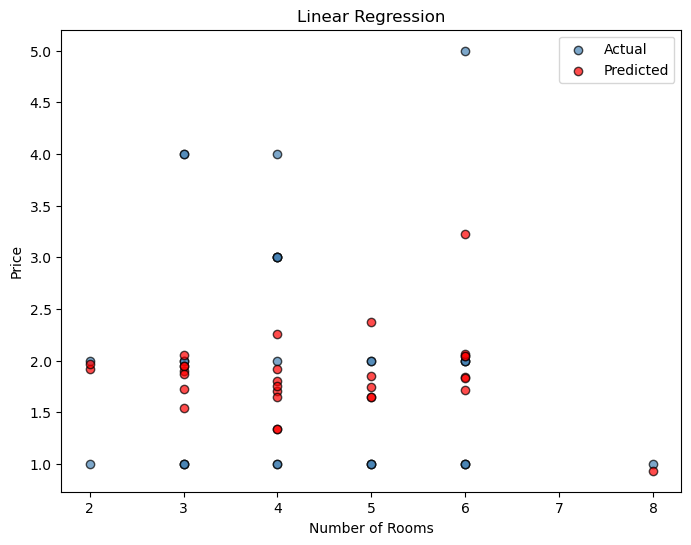

c:\Users\Sharon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


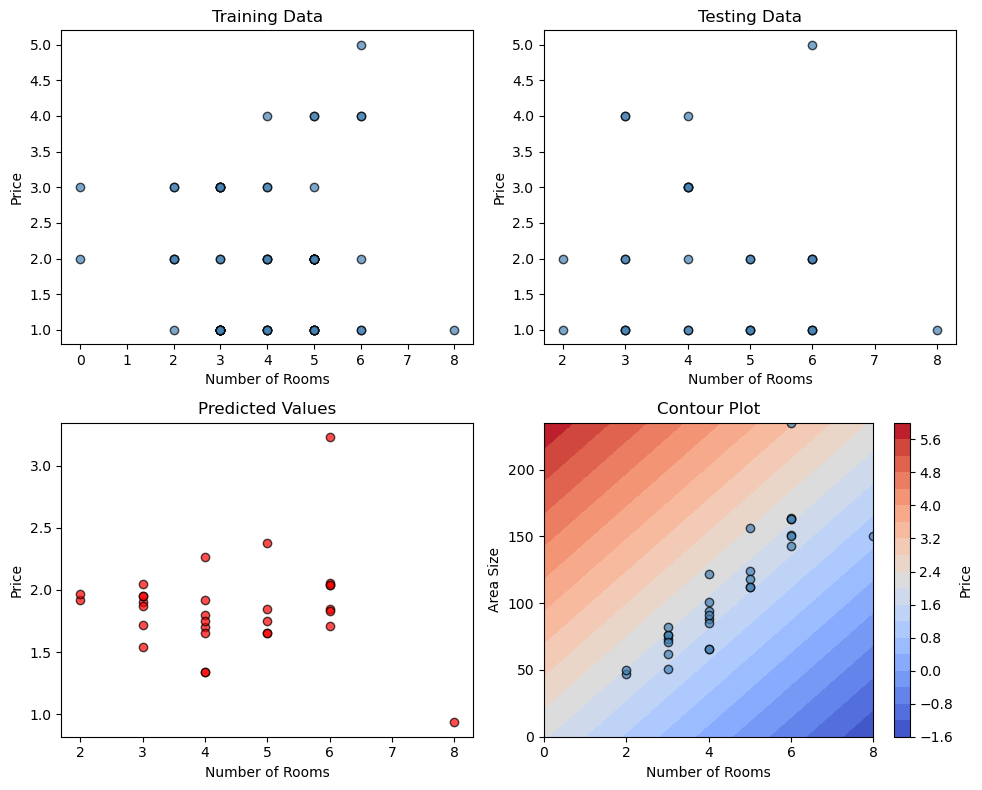

In [ ]:
import matplotlib.colorbar as cbar

# Set the feature names of x_test
x_test.columns = ['rooms', 'area_size']

# Set a common color for the scatter plots
scatter_color = 'steelblue'

# Plotting the scatter plot with the regression line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_test['rooms'], y_test, color=scatter_color, label='Actual', alpha=0.7, edgecolors='k')
ax.scatter(x_test['rooms'], y_pred, color='red', label='Predicted', alpha=0.7, edgecolors='k')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Price')
ax.set_title('Linear Regression')
ax.legend()
plt.show()

# Plotting the contour plot
x_range = np.linspace(np.min(x['rooms']), np.max(x['rooms']), 100)
y_range = np.linspace(np.min(x['area_size']), np.max(x['area_size']), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = model.predict(np.array([x_mesh.ravel(), y_mesh.ravel()]).T).reshape(x_mesh.shape)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of training data
axs[0, 0].scatter(x_train['rooms'], y_train, color=scatter_color, alpha=0.7, edgecolors='k')
axs[0, 0].set_xlabel('Number of Rooms')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('Training Data')

# Scatter plot of testing data
axs[0, 1].scatter(x_test['rooms'], y_test, color=scatter_color, alpha=0.7, edgecolors='k')
axs[0, 1].set_xlabel('Number of Rooms')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Testing Data')

# Predicted values scatter plot
axs[1, 0].scatter(x_test['rooms'], y_pred, color='red', alpha=0.7, edgecolors='k')
axs[1, 0].set_xlabel('Number of Rooms')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Predicted Values')

# Contour plot
contour = axs[1, 1].contourf(x_mesh, y_mesh, z_mesh, levels=20, cmap='coolwarm')
axs[1, 1].scatter(x_test['rooms'], x_test['area_size'], color=scatter_color, alpha=0.7, edgecolors='k')
axs[1, 1].set_xlabel('Number of Rooms')
axs[1, 1].set_ylabel('Area Size')
axs[1, 1].set_title('Contour Plot')

# Add colorbar
cbar = fig.colorbar(contour, ax=axs[1, 1])
cbar.set_label('Price')

plt.tight_layout()
plt.show()
